In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


**Problem 1**

In [231]:
data = pd.read_excel("Employee_attrition.xlsx")
# as there were spaces in the data, I converted csv to xlsx format to make data understandabel for python

In [232]:
# some adjustment in the data: replacing "&" sign with "and"

In [233]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research_and_Development,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_and_Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_and_Development,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research_and_Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [235]:
# there are no missing values

In [236]:
data_numeric = data.select_dtypes(exclude="object")
data_object = data.select_dtypes(include="object")
# separating data into two subsets: numeric and objects

In [237]:
data_object.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life_Sciences,Female,Sales_Executive,Single,Y,Yes
1,No,Travel_Frequently,Research_and_Development,Life_Sciences,Male,Research_Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research_and_Development,Other,Male,Laboratory_Technician,Single,Y,Yes
3,No,Travel_Frequently,Research_and_Development,Life_Sciences,Female,Research_Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research_and_Development,Medical,Male,Laboratory_Technician,Married,Y,No


In [238]:
data_numeric.var()==0

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [239]:
# we should drop all variables that have 0 variance, in this case StandardHours variable as it is "True"

In [240]:
data_numeric.EmployeeCount.var()==0

True

In [241]:
# also, we can observe that EmployeeCount variable has also 0 variance, so it should be dropped too.

In [242]:
data_numeric = data_numeric.drop(["StandardHours", "EmployeeCount"], axis = 1)

In [243]:
for i in data_object.columns:
    print(data_object[i].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research_and_Development' 'Human_Resources']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree'
 'Human_Resources']
['Female' 'Male']
['Sales_Executive' 'Research_Scientist' 'Laboratory_Technician'
 'Manufacturing_Director' 'Healthcare_Representative' 'Manager'
 'Sales_Representative' 'Research_Director' 'Human_Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [244]:
# we should remove the columns that have object variable with one category

In [245]:
# in this case, it is the variable Over18 that has one category which is "Y", so we drop it

In [246]:
data_object = data_object.drop(["Over18"], axis = 1)

In [247]:
# converting object variables into dummy variables

data_dummies = pd.get_dummies(data_object, prefix=data_object.columns, drop_first=True)

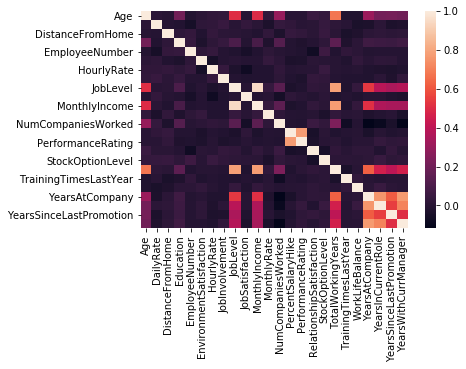

In [248]:
sns.heatmap(data_numeric.corr())

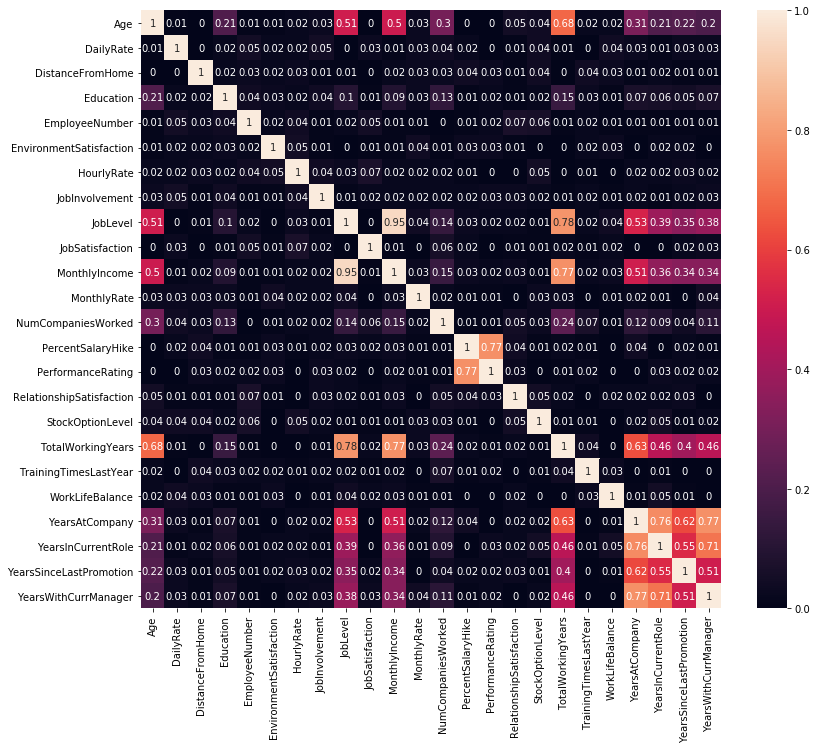

In [249]:
# to make the graph more visible 
plt.figure(figsize=(13, 11)) 
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

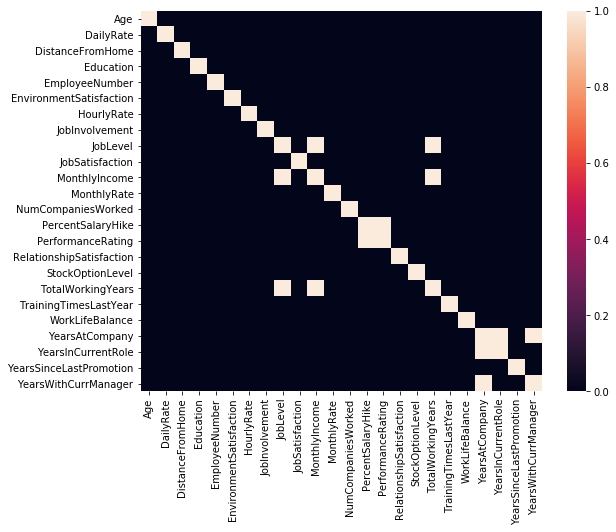

In [250]:
plt.figure(figsize=(9, 7)) 
sns.heatmap(data_numeric.corr().abs()>=0.75)
plt.show()
#to see which correlations are above or equal to 75% in absolute values

In [251]:
# this way we can more visibly see which variables have 75% or more  correlation

In [252]:
del data_numeric["YearsAtCompany"]

# dropping the variables that have high correlations

In [253]:
del data_numeric["TotalWorkingYears"]

In [254]:
del data_numeric["JobLevel"]

In [255]:
del data_numeric["PercentSalaryHike"]

# dropping the variables that have high correlations

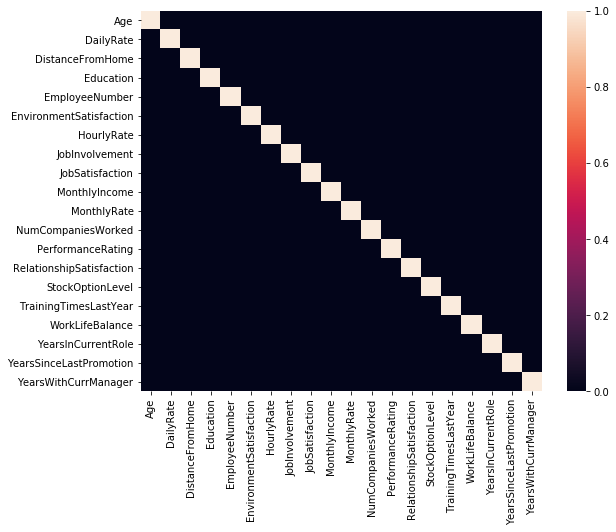

In [256]:
plt.figure(figsize=(9, 7)) 
sns.heatmap(data_numeric.corr().abs()>=0.75)
plt.show()

In [257]:
data_final = data_numeric.join(data_dummies)
# joining data_numeric with data_dummies

In [258]:
data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,2,3468,...,1,0,0,0,0,0,0,1,0,0


**Logistic Regression**

In [259]:
# to see percenatage of employees who have not left their jobs 

data_final.Attrition_Yes.value_counts()/len(data_final)*100

0    83.877551
1    16.122449
Name: Attrition_Yes, dtype: float64

In [260]:
# Almost 84% of employees haven't left their jobs. This means that without any model we will probably clasify a new record (a new employee) as 0, 
# however we want to do better than this classification.

In [261]:
Y = data_final.Attrition_Yes
X = data_final.drop("Attrition_Yes",axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [262]:
#to run logit from statsmodel, we should get formula
formula = 'Y~'+'+'.join(X.columns.tolist())
formula

'Y~Age+DailyRate+DistanceFromHome+Education+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobSatisfaction+MonthlyIncome+MonthlyRate+NumCompaniesWorked+PerformanceRating+RelationshipSatisfaction+StockOptionLevel+TrainingTimesLastYear+WorkLifeBalance+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager+BusinessTravel_Travel_Frequently+BusinessTravel_Travel_Rarely+Department_Research_and_Development+Department_Sales+EducationField_Life_Sciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_Technical_Degree+Gender_Male+JobRole_Human_Resources+JobRole_Laboratory_Technician+JobRole_Manager+JobRole_Manufacturing_Director+JobRole_Research_Director+JobRole_Research_Scientist+JobRole_Sales_Executive+JobRole_Sales_Representative+MaritalStatus_Married+MaritalStatus_Single+OverTime_Yes'

In [263]:
logit = Logit.from_formula(formula = formula, data = data_final).fit()

         Current function value: 0.294829
         Iterations: 35


/Users/Mariana/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [264]:
logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Logit
==========================================================================================
Model:                       Logit                    Pseudo R-squared:         0.333     
Dependent Variable:          Y                        AIC:                      950.7961  
Date:                        2018-11-10 22:22         BIC:                      1173.1029 
No. Observations:            1470                     Log-Likelihood:           -433.40   
Df Model:                    41                       LL-Null:                  -649.29   
Df Residuals:                1428                     LLR p-value:              1.1599e-66
Converged:                   0.0000                   Scale:                    1.0000    
No. Iterations:              35.0000                                                      
------------------------------------------------------------------------------------------
                                     Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
------------------------------------------------------------------------------------------
Intercept                           -10.8938 1023.9605 -0.0106 0.9915 -2017.8195 1996.0319
Age                                  -0.0432    0.0122 -3.5413 0.0004    -0.0670   -0.0193
DailyRate                            -0.0003    0.0002 -1.3876 0.1653    -0.0007    0.0001
DistanceFromHome                      0.0438    0.0107  4.1021 0.0000     0.0229    0.0647
Education                             0.0093    0.0877  0.1066 0.9151    -0.1625    0.1812
EmployeeNumber                       -0.0001    0.0002 -0.8985 0.3689    -0.0004    0.0002
EnvironmentSatisfaction              -0.4187    0.0824 -5.0831 0.0000    -0.5802   -0.2573
HourlyRate                            0.0016    0.0044  0.3699 0.7114    -0.0070    0.0102
JobInvolvement                       -0.5277    0.1212 -4.3547 0.0000    -0.7653   -0.2902
JobSatisfaction                      -0.3978    0.0805 -4.9426 0.0000    -0.5556   -0.2401
MonthlyIncome                        -0.0000    0.0001 -0.5422 0.5877    -0.0001    0.0001
MonthlyRate                           0.0000    0.0000  0.3369 0.7362    -0.0000    0.0000
NumCompaniesWorked                    0.1650    0.0373  4.4253 0.0000     0.0919    0.2380
PerformanceRating                    -0.0989    0.2501 -0.3953 0.6926    -0.5891    0.3914
RelationshipSatisfaction             -0.2515    0.0823 -3.0570 0.0022    -0.4128   -0.0903
StockOptionLevel                     -0.1900    0.1575 -1.2059 0.2278    -0.4987    0.1188
TrainingTimesLastYear                -0.1835    0.0727 -2.5252 0.0116    -0.3260   -0.0411
WorkLifeBalance                      -0.3637    0.1234 -2.9459 0.0032    -0.6056   -0.1217
YearsInCurrentRole                   -0.1156    0.0422 -2.7412 0.0061    -0.1983   -0.0329
YearsSinceLastPromotion               0.2008    0.0404  4.9719 0.0000     0.1216    0.2799
YearsWithCurrManager                 -0.0985    0.0416 -2.3677 0.0179    -0.1800   -0.0170
BusinessTravel_Travel_Frequently      1.8665    0.4078  4.5773 0.0000     1.0673    2.6657
BusinessTravel_Travel_Rarely          0.9709    0.3761  2.5816 0.0098     0.2338    1.7081
Department_Research_and_Development  13.5900 1023.9596  0.0133 0.9894 -1993.3340 2020.5140
Department_Sales                     13.3493 1023.9597  0.0130 0.9896 -1993.5749 2020.2734
EducationField_Life_Sciences         -0.7139    0.8014 -0.8909 0.3730    -2.2845    0.8567
EducationField_Marketing             -0.3214    0.8490 -0.3786 0.7050    -1.9855    1.3427
EducationField_Medical               -0.7941    0.8006 -0.9919 0.3213    -2.3632    0.7750
EducationField_Other                 -0.8147    0.8605 -0.9467 0.3438    -2.5013    0.8720
EducationField_Technical_Degree       0.1744    0.8190  0.2129 0.8314    -1.4309    1.7797
Gender_Male                           0.4042    0.1837  2.2003 0.0278     0.

**From the output we got, we can see that there are many statistically significant variables as their p-values are less than 0.05.
Those variables are Age, DistanceFromHome, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, etc. 
These variables have statistically significant relationship with probability of employees' attrition.
Interpretation of one of the statistically significant variables: JobSatisfaction
As the coefficient of JobSatisfaction is negative (-0.4143),then a unit increase in Job Satisfaction decreases the probability of employee churn, ceteris paribus**.


In [277]:
#Logit from sklearn for prediction
logit_sk = LogisticRegression()

In [278]:
logit_sk = logit_sk.fit(x_train,y_train)

In [279]:
# getting accuracy score

logit_sk.score(x_test,y_test)


0.8804347826086957

In [280]:
#accurate by almost 88%

**Problem 2** - 
**Decision Tree**

In [269]:
tree_1 = DecisionTreeClassifier(random_state = 42)
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [270]:
tree_1.score(x_train, y_train)
# it can be high artificially 

1.0

In [271]:
tree_1.score(x_test, y_test)


0.782608695652174

In [272]:
# the output is not desirable because it is lower than the benchmark

In [273]:
importances = tree_1.feature_importances_
importances = pd.DataFrame(data=importances, index=X.columns, columns=['importances'])

In [274]:
#only first variable has comparatively higher importance, the importances of other variables is lower
importances.sort_values(by = "importances", ascending=False)

,importances
MonthlyIncome,0.142486
DailyRate,0.090195
EmployeeNumber,0.080821
OverTime_Yes,0.075114
Age,0.069635
YearsInCurrentRole,0.051618
HourlyRate,0.045605
NumCompaniesWorked,0.044997
YearsSinceLastPromotion,0.040302
MonthlyRate,0.038930


In [275]:
#get accuracy score again by cutting the tree

tree_2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 100, random_state = 42)
tree_2.fit(x_train,y_train)
tree_2.score(x_test,y_test)


0.8532608695652174

**We can see that the accuracy is lower than in Logistic Regression, so it is more preferable as its accuracy score is higher compared to Decision tree's.**

In [276]:
# to visually see new tree
tree_gr = export_graphviz(tree_1, out_file = "tree2.dot", class_names = True, feature_names = X.columns, filled = True)
